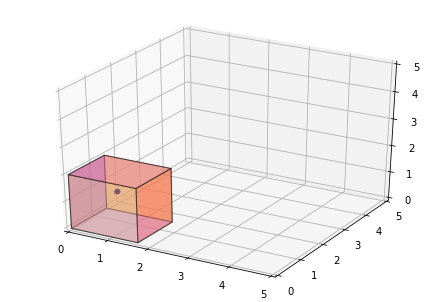

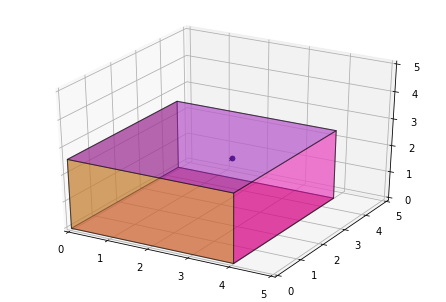

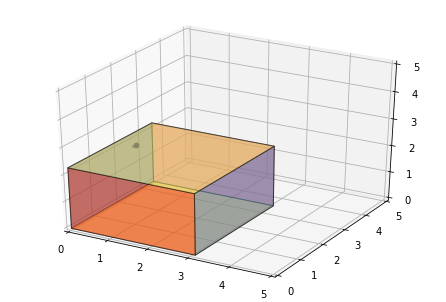

In [6]:
from room_simulator import room_simulator as rs
import matplotlib.pyplot as plt
n=None
n=rs(N_mutations_per_roomtype=1,roomtype="toilet")
for room in n.rooms:
    f,ax=room.plot()
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    ax.set_zlim([0,5])
    plt.show()
    
n=rs(N_mutations_per_roomtype=1,roomtype="livingroom")
for room in n.rooms:
    f,ax=room.plot()
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    ax.set_zlim([0,5])
    plt.show()
    
n=rs(N_mutations_per_roomtype=1,roomtype="bathroom")
for room in n.rooms:
    f,ax=room.plot()
    ax.set_xlim([0,5])
    ax.set_ylim([0,5])
    ax.set_zlim([0,5])
    plt.show()

# Clean Data folder

In [41]:
import os

PATH="data/"
ROOMTYPES=["toilet","livingroom","bathroom"]
for roomtype in ROOMTYPES:
    for index,file in enumerate(os.listdir(PATH+roomtype)):
        index_str='{0:04d}'.format(index)
        os.rename(PATH+roomtype+"/"+file, PATH+roomtype+"/"+index_str+".h5")
    

In [42]:
print(len(os.listdir("data/toilet")))
print(len(os.listdir("data/livingroom")))
print(len(os.listdir("data/bathroom")))

41
1683
1427


In [12]:
def get_nextindex(folder):
    current_index=0
    for file in os.listdir(folder):
        i=int(file.split(".")[0])
        if i>=current_index:
            current_index=i
    return current_index+1
get_nextindex("data/bathroom")

1000

# Simulate Data

In [43]:
from room_simulator import room_simulator as rs
import numpy as np
import time
import multiprocessing
from pathlib import Path
import h5py
import logging
import os
PATH="data/"
ROOMTYPES=["toilet","livingroom","bathroom"]
MAX_ITEMS=1000

def process_function(process_index):
    logging.info("Process "+str(process_index)+" started")
    class_counts=[]
    for rt in ROOMTYPES:
        Path('data/'+rt).mkdir(parents=True, exist_ok=True)
        class_counts.append(len(os.listdir(PATH+rt)))
    threadcounter=0
    while np.min(class_counts)<MAX_ITEMS:
        class_counts=[]
        for rt in ROOMTYPES:
            class_counts.append(len(os.listdir(PATH+rt)))
        next_roomtype=ROOMTYPES[np.argmin(class_counts)]
        #print("new room thread:",next_roomtype)
        ########################################
        room=None
        room=rs(N_mutations_per_roomtype=1,roomtype=next_roomtype).rooms[0]
        logging.info("Process "+str(process_index)+" :"+next_roomtype+" "+str(threadcounter)+" room started")
        #room.compute_rir()
        room.simulate()
        name="pi"+str(process_index)+"_"+str(threadcounter)
        with h5py.File('data/'+next_roomtype+'/'+name+'.h5',"a") as f:
            f.create_dataset('signal',data=room.mic_array.signals[0,:],chunks=True, compression="gzip")
            f.create_dataset('rir',data=room.rir[0][0],chunks=True,compression="gzip")
        logging.info("--Process "+str(process_index)+" :"+next_roomtype+" "+str(threadcounter)+" room created")
        threadcounter+=1
    return 1

if __name__ == '__main__':
    #start = time.time()
    format = "%(asctime)s: %(message)s"
    logging.basicConfig(format=format, level=logging.WARN,datefmt="%H:%M:%S")
    jobs=[]
    for process_index in range(1):
        p = multiprocessing.Process(target=process_function, args=(process_index,))
        jobs.append(p)
        p.start()
    p.join()    

15:43:42: Process 0 started
15:43:43: Process 0 :toilet 0 room started
15:44:24: --Process 0 :toilet 0 room created
15:44:24: Process 0 :toilet 1 room started
15:45:55: --Process 0 :toilet 1 room created
15:45:56: Process 0 :toilet 2 room started
15:46:40: --Process 0 :toilet 2 room created
15:46:40: Process 0 :toilet 3 room started
15:48:39: --Process 0 :toilet 3 room created
15:48:39: Process 0 :toilet 4 room started
15:49:13: --Process 0 :toilet 4 room created
15:49:13: Process 0 :toilet 5 room started
15:50:34: --Process 0 :toilet 5 room created
15:50:34: Process 0 :toilet 6 room started
15:51:05: --Process 0 :toilet 6 room created
15:51:06: Process 0 :toilet 7 room started
15:52:07: --Process 0 :toilet 7 room created
15:52:07: Process 0 :toilet 8 room started
15:53:00: --Process 0 :toilet 8 room created
15:53:00: Process 0 :toilet 9 room started
15:54:01: --Process 0 :toilet 9 room created
15:54:01: Process 0 :toilet 10 room started
15:54:32: --Process 0 :toilet 10 room created
15

KeyboardInterrupt: 

Process Process-7:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-43-a60d2e0f4f6b>", line 31, in process_function
    room.simulate()
  File "/Users/simonwolf/Projekte/echo_classification/.env/lib/python3.6/site-packages/pyroomacoustics/room.py", line 1971, in simulate
    self.compute_rir()
  File "/Users/simonwolf/Projekte/echo_classification/.env/lib/python3.6/site-packages/pyroomacoustics/room.py", line 1849, in compute_rir
    fast_rir_builder(ir_loc, time_adjust, alpha, vis, self.fs, fdl)
KeyboardInterrupt
